# Transient Universe: MCMC Sampling

### WIP - Unfinished!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import pymc3 as pm

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

In [3]:
data = np.load('../solutions/transient.npy')

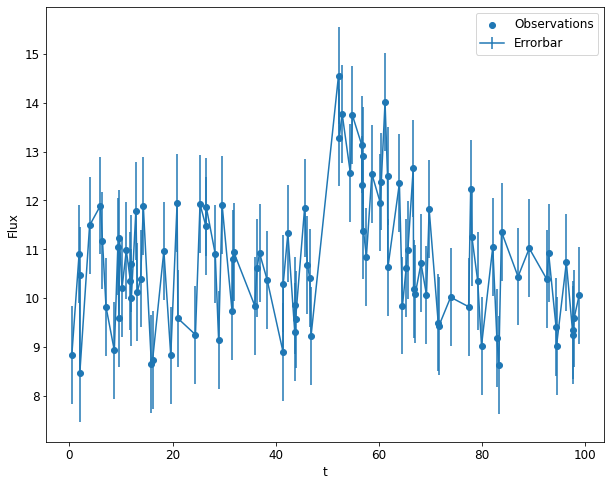

In [4]:
#Unpacking and visualizing data

#t, flux, flux_err = data.T

t = data[:, 0]
flux = data[:, 1]
flux_err = data[:, 2]

plt.scatter(t, flux, label='Observations')
plt.errorbar(t, flux, yerr=flux_err, label='Errorbar')
plt.xlabel('t')
plt.ylabel('Flux')
plt.legend()
plt.show()

Burst model approximation in which signal is:

$y = b$ if  $t < t_{0}$

$y = b + A\cdot \exp[-\alpha(t-t_{0}])$ if  $t \geq t_{0}$

In [5]:
#Function modeling Signal: Noise + Exponential decay
def fun_model(parameters, t):

    b, t_0, A, alpha = parameters

    return np.where(t<t_0, b, b + A * np.exp(-alpha * (t - t_0)))

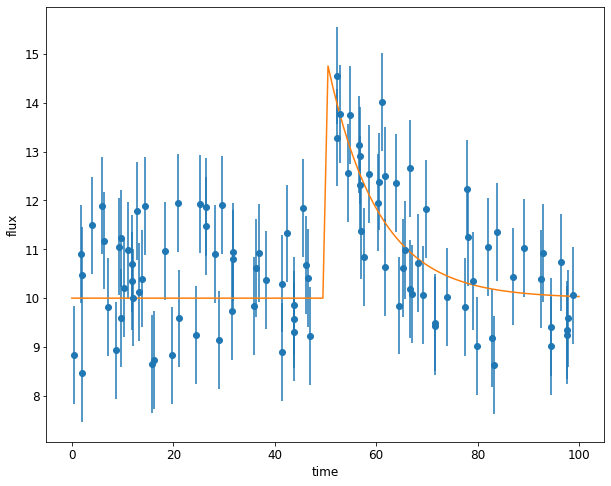

In [6]:
#Eyeball estimate
tgrid=np.linspace(0,100,100)
t0_quick=50
A_quick=5
b_quick=10
alpha_quick=0.1

theta_quick= np.array([b_quick, t0_quick, A_quick, alpha_quick])

#Evaluating the function
ygrid = fun_model(theta_quick, tgrid)

plt.errorbar(t, flux ,yerr=flux_err, fmt='o')
plt.xlabel("time")
plt.ylabel("flux")
plt.plot(tgrid, ygrid);

## PYMC3

In [9]:
with pm.Model ():
    #Priors
    b = pm.Uniform('b', 0, 50)
    t_0 = pm.Uniform('t_0', 0, 50)
    A = pm.Uniform('A', 0, 100)
    alpha = pm.Uniform('alpha', -5, 5)      #uniform in Log

    #Likelihood function
    pm.Potential('burst', fun_model([b, t_0, A, alpha], t=t), observed=flux)

    trace = pm.sample(draws=250, cores=4, progressbar=True)

ValueError: setting an array element with a sequence.

It does not draw from the posterior!!!


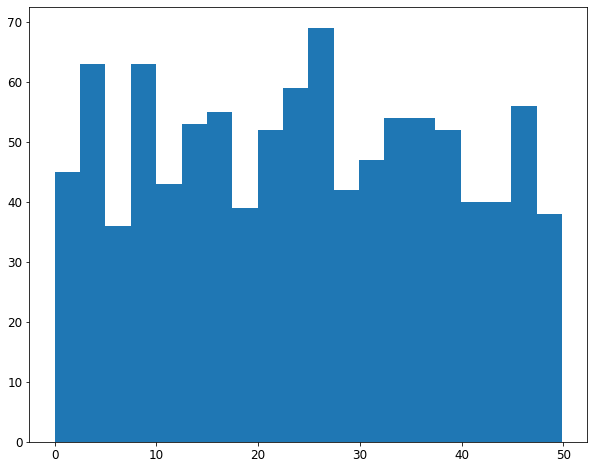

In [121]:
#This pipeline works, check if samples are from posterior or from prior!

#Gathering samples
b_samples = trace.get_values('b');
t_0_samples = trace.get_values('t_0');
A_samples = trace.get_values('A');
alpha_samples = trace.get_values('alpha');

plt.hist(b_samples, bins=20);

print('It does not draw from the posterior!!!')



## EMCEE